In [2]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import os
import xarray
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy
import datetime
import pickle
from ll_xy import lonlat_to_xy
import matplotlib.pyplot as plt
import kuka_tools as kt

In [3]:
df = pd.read_csv('../../data/data_fields',delim_whitespace=True,header=None)

header='TOTAL_CLOUD_AMOUNT WIND_DIRECTION WIND_SPEED VISIBILITY PRESENT_WEATHER PAST_WEATHER MSL_PRESSURE DRYBULB_TEMPERATURE WETBULB_TEMPERATURE VAPOUR_PRESSURE RELATIVE_HUMIDITY LOW_CLOUD_AMOUNT LOW_CLOUD_TYPE MEDIUM_CLOUD_TYPE HIGH_CLOUD_TYPE DEWPOINT FIRST_CLOUD_AMOUNT FIRST_CLOUD_TYPE FIRST_CLOUD_HEIGHT SECOND_CLOUD_AMOUNT SECOND_CLOUD_TYPE SECOND_CLOUD_HEIGHT THIRD_CLOUD_AMOUNT THIRD_CLOUD_TYPE THIRD_CLOUD_HEIGHT SOURCE MAXIMUM_TEMPERATURE MINIMUM_TEMPERATURE'
header = ['year','month','day','hour','minute']+header.split(' ')+['x']
df.columns = header

dts = []

for year,month,day,hour,minute in zip(df['year'],df['month'],df['day'],df['hour'],df['minute']):

    dts.append( datetime.datetime(year,month,day,hour,minute))

df['dt'] = dts

df['date'] = [x.date() for x in df['dt']]

df

,year,month,day,hour,minute,TOTAL_CLOUD_AMOUNT,WIND_DIRECTION,WIND_SPEED,VISIBILITY,PRESENT_WEATHER,...,SECOND_CLOUD_HEIGHT,THIRD_CLOUD_AMOUNT,THIRD_CLOUD_TYPE,THIRD_CLOUD_HEIGHT,SOURCE,MAXIMUM_TEMPERATURE,MINIMUM_TEMPERATURE,x,dt,date
0,2023,10,1,23,0,NaN,330.0,28.0,NaN,NaN,...,NaN,NaN,NaN,NaN,JAWS,SYNOP,NaN,NaN,2023-10-01 23:00:00,2023-10-01
1,2023,10,1,22,0,NaN,320.0,23.0,NaN,NaN,...,NaN,NaN,NaN,NaN,JAWS,SYNOP,NaN,NaN,2023-10-01 22:00:00,2023-10-01
2,2023,10,1,21,0,7.0,330.0,23.0,82.0,NaN,...,58.0,NaN,NaN,NaN,JAWS,SYNOP,NaN,NaN,2023-10-01 21:00:00,2023-10-01
3,2023,10,1,20,0,NaN,330.0,25.0,NaN,NaN,...,NaN,NaN,NaN,NaN,JAWS,SYNOP,NaN,NaN,2023-10-01 20:00:00,2023-10-01
4,2023,10,1,19,0,NaN,330.0,27.0,NaN,NaN,...,NaN,NaN,NaN,NaN,JAWS,SYNOP,NaN,NaN,2023-10-01 19:00:00,2023-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2023,8,1,4,0,NaN,320.0,18.0,NaN,NaN,...,NaN,NaN,NaN,NaN,JAWS,SYNOP,NaN,NaN,2023-08-01 04:00:00,2023-08-01
1457,2023,8,1,3,0,NaN,320.0,13.0,NaN,NaN,...,NaN,NaN,NaN,NaN,JAWS,SYNOP,NaN,NaN,2023-08-01 03:00:00,2023-08-01
1458,2023,8,1,2,0,NaN,330.0,15.0,NaN,NaN,...,NaN,NaN,NaN,NaN,JAWS,SYNOP,NaN,NaN,2023-08-01 02:00:00,2023-08-01
1459,2023,8,1,1,0,NaN,320.0,19.0,NaN,NaN,...,NaN,NaN,NaN,NaN,JAWS,SYNOP,NaN,NaN,2023-08-01 01:00:00,2023-08-01


In [4]:
pickle.dump(df,open('../../data/pickles/weather_df.p','wb'))

(-0.038988435374150754, -10.484066666666667)

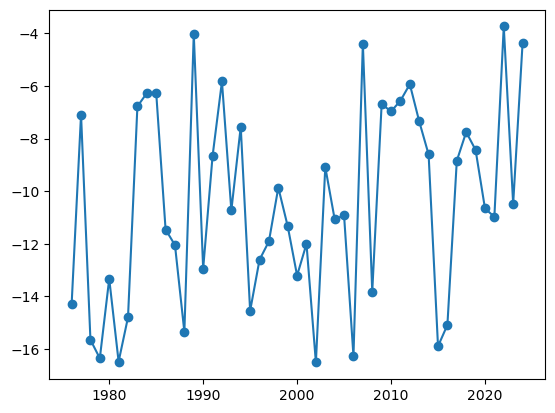

In [56]:
spd = pd.read_csv('../../data/rothera/Weather/t2m.csv',delim_whitespace=True,)


dts = []
for year,month,day in zip(spd['yyyy'],spd['mm'],spd['dd']):
    
    dt = datetime.date(year,month,day)
    dts.append(dt)
spd['dt']=dts

mean_pressures = []
years = np.arange(1976,2025)
for year in years:
    
    df = spd[spd['yyyy']==year]
    
    df = df[df['dt']>datetime.date(year,8,14)]
    df = df[df['dt']<datetime.date(year,8,30)]
    
    mean_pressures.append( np.nanmean(df['AVG']) )

plt.plot(years,mean_pressures,marker='o')

std = np.std(mean_pressures)
mean = np.nanmean(mean_pressures)
p_2023=mean_pressures[-2]
(p_2023-mean), p_2023

(-1.5621683673469402, -10.150166666666667)

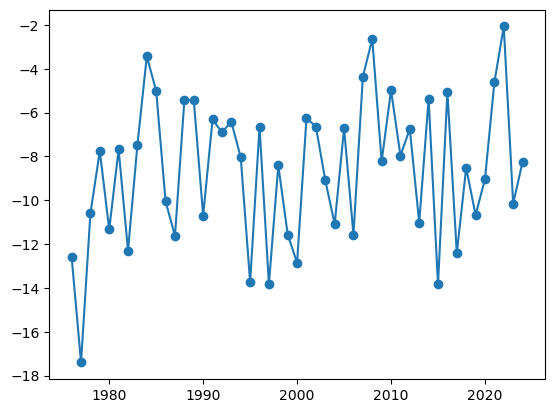

In [57]:
spd = pd.read_csv('../../data/rothera/Weather/t2m.csv',delim_whitespace=True,)


dts = []
for year,month,day in zip(spd['yyyy'],spd['mm'],spd['dd']):
    
    dt = datetime.date(year,month,day)
    dts.append(dt)
spd['dt']=dts

mean_pressures = []
years = np.arange(1976,2025)
for year in years:
    
    df = spd[spd['yyyy']==year]
    
    df = df[df['dt']>datetime.date(year,8,30)]
    df = df[df['dt']<datetime.date(year,9,24)]
    
    mean_pressures.append( np.nanmean(df['AVG']) )

plt.plot(years,mean_pressures,marker='o')

std = np.std(mean_pressures)
mean = np.nanmean(mean_pressures)
p_2023=mean_pressures[-2]
(p_2023-mean), p_2023

1.4895227393082202

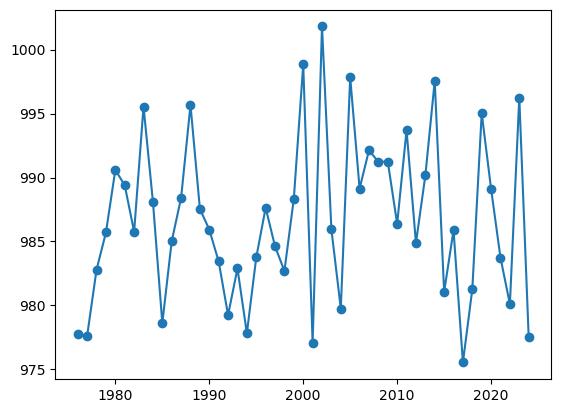

In [50]:
spd = pd.read_csv('../../data/rothera/Weather/mslp.csv',delim_whitespace=True,)


dts = []
for year,month,day in zip(spd['yyyy'],spd['mm'],spd['dd']):
    
    dt = datetime.date(year,month,day)
    dts.append(dt)
spd['dt']=dts

mean_pressures = []
years = np.arange(1976,2025)
for year in years:
    
    df = spd[spd['yyyy']==year]
    
    df = df[df['dt']>datetime.date(year,8,14)]
    df = df[df['dt']<datetime.date(year,9,24)]
    
    mean_pressures.append( np.nanmean(df['AVG']) )

plt.plot(years,mean_pressures,marker='o')

std = np.std(mean_pressures)
mean = np.nanmean(mean_pressures)
p_2023=mean_pressures[-2]
(p_2023-mean)/std

1.2682978508484961

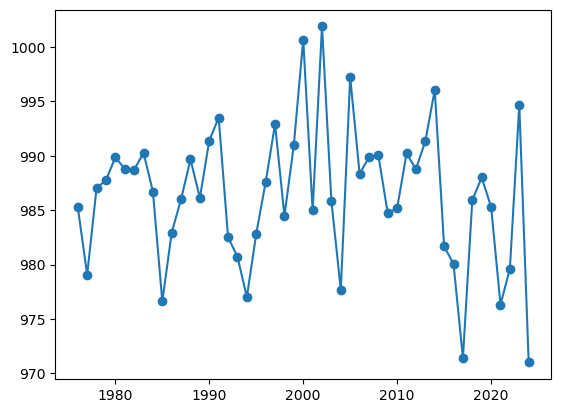

In [38]:
spd = pd.read_csv('../../data/rothera/september_pressures.csv',sep=',')
spd['year'] = np.arange(1976,2025,1)[::-1]
spd

plt.plot(spd['year'],spd['pressure'],marker='o')

std = np.std(spd['pressure'])
mean = np.nanmean(spd['pressure'])
p_2023=994.659
(p_2023-mean)/std

In [5]:
months = [8,8,9,9,9,9,9,9]
days = [30,31,1,4,10,15,20,23]

transect_datetimes = []
for day, month in zip(days,months):

    transect_datetimes.append(datetime.datetime(2023,month,day,12,0,0))

transect_datetimes

[datetime.datetime(2023, 8, 30, 12, 0),
 datetime.datetime(2023, 8, 31, 12, 0),
 datetime.datetime(2023, 9, 1, 12, 0),
 datetime.datetime(2023, 9, 4, 12, 0),
 datetime.datetime(2023, 9, 10, 12, 0),
 datetime.datetime(2023, 9, 15, 12, 0),
 datetime.datetime(2023, 9, 20, 12, 0),
 datetime.datetime(2023, 9, 23, 12, 0)]

In [6]:
df.columns

Index(['year', 'month', 'day', 'hour', 'minute', 'TOTAL_CLOUD_AMOUNT',
       'WIND_DIRECTION', 'WIND_SPEED', 'VISIBILITY', 'PRESENT_WEATHER',
       'PAST_WEATHER', 'MSL_PRESSURE', 'DRYBULB_TEMPERATURE',
       'WETBULB_TEMPERATURE', 'VAPOUR_PRESSURE', 'RELATIVE_HUMIDITY',
       'LOW_CLOUD_AMOUNT', 'LOW_CLOUD_TYPE', 'MEDIUM_CLOUD_TYPE',
       'HIGH_CLOUD_TYPE', 'DEWPOINT', 'FIRST_CLOUD_AMOUNT', 'FIRST_CLOUD_TYPE',
       'FIRST_CLOUD_HEIGHT', 'SECOND_CLOUD_AMOUNT', 'SECOND_CLOUD_TYPE',
       'SECOND_CLOUD_HEIGHT', 'THIRD_CLOUD_AMOUNT', 'THIRD_CLOUD_TYPE',
       'THIRD_CLOUD_HEIGHT', 'SOURCE', 'MAXIMUM_TEMPERATURE',
       'MINIMUM_TEMPERATURE', 'x', 'dt', 'date'],
      dtype='object')

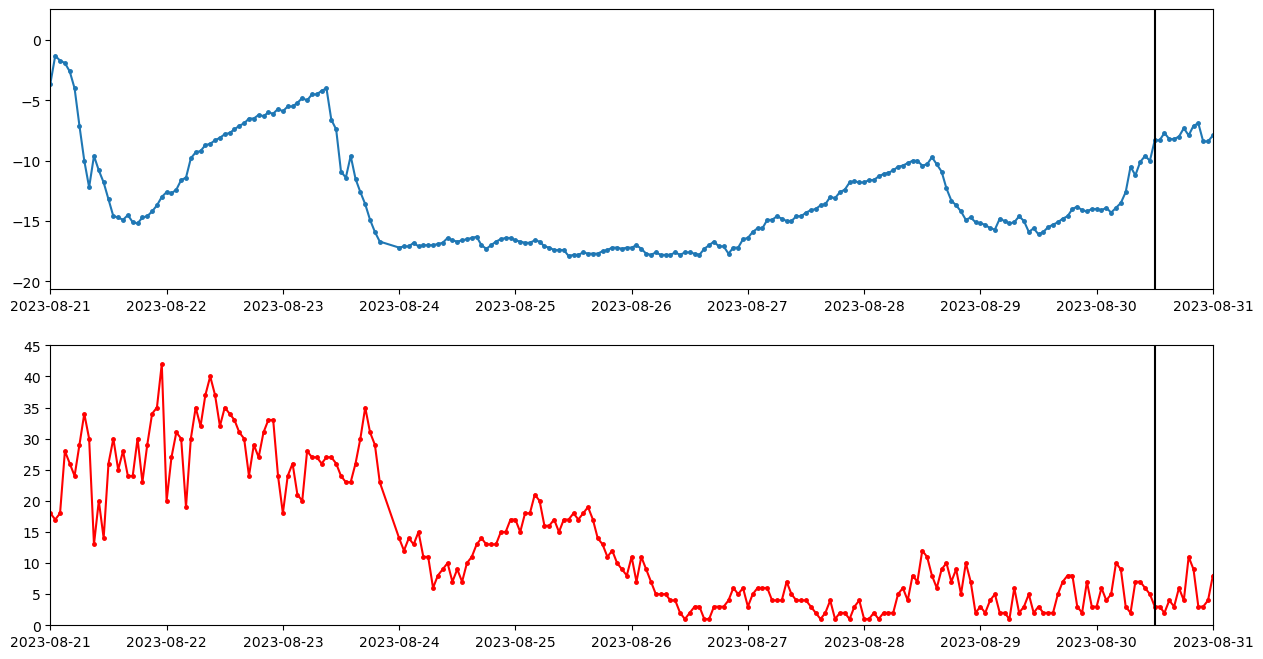

In [38]:
start_date = datetime.datetime(2023,8,21,0,0)

end_date = datetime.datetime(2023,8,31,0,0)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,8))
ax1.plot(df['dt'],df['DRYBULB_TEMPERATURE'],marker='.',markersize=5)

ax2.plot(df['dt'],df['WIND_SPEED'],marker='.',markersize=5,color='r')

ax2.set_ylim(0,45)

# ax2 = ax.twinx()

# ax2.plot(df['dt'],df['WIND_SPEED'],marker='.',markersize=5,color='r')

for ax in [ax1,ax2]:
    for dt in transect_datetimes:
        ax.axvline(dt,color='k')

    ax.set_xlim(start_date,end_date)


# plt.plot(

In [39]:
df['date'] = [x.date() for x in df['dt']]

df_23rd = df[df['date']==datetime.date(2023,8,23)]
np.max(df_23rd['WIND_SPEED']),np.max(df_23rd['DRYBULB_TEMPERATURE'])

(35.0, -4.0)

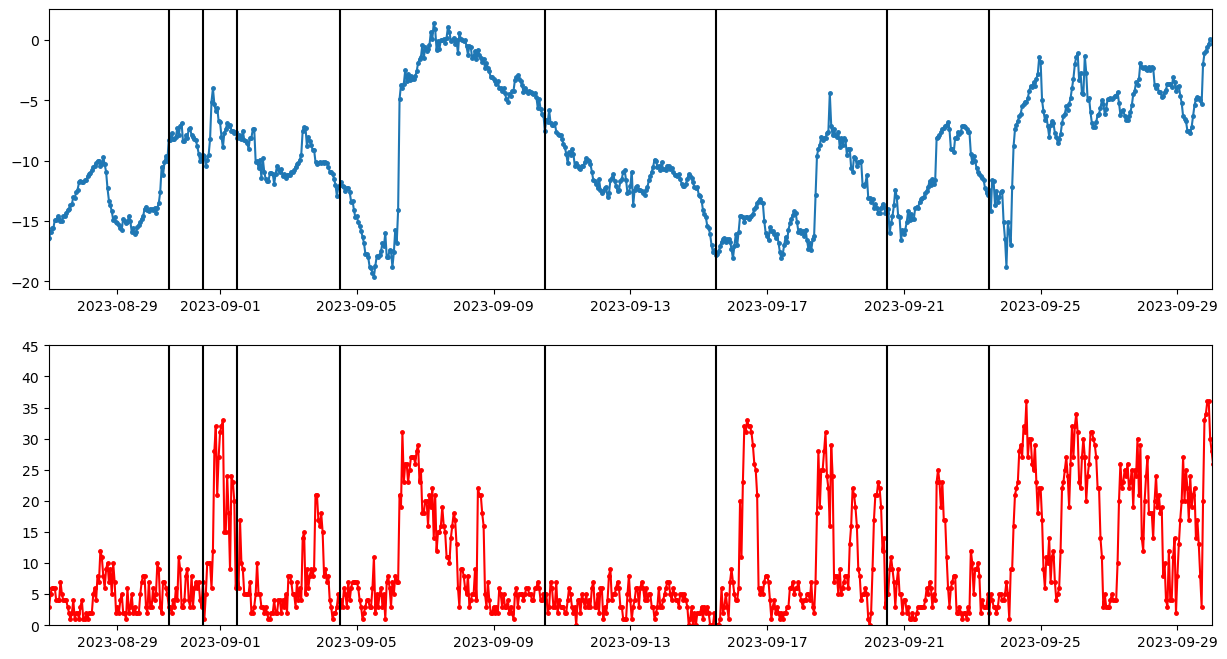

In [40]:
start_date = datetime.datetime(2023,8,27,0,0)

end_date = datetime.datetime(2023,9,30,0,0)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,8))
ax1.plot(df['dt'],df['DRYBULB_TEMPERATURE'],marker='.',markersize=5)

ax2.plot(df['dt'],df['WIND_SPEED'],marker='.',markersize=5,color='r')

ax2.set_ylim(0,45)

# ax2 = ax.twinx()

# ax2.plot(df['dt'],df['WIND_SPEED'],marker='.',markersize=5,color='r')

for ax in [ax1,ax2]:
    for dt in transect_datetimes:
        ax.axvline(dt,color='k')

    ax.set_xlim(start_date,end_date)


# plt.plot(